In [1]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = r"C:\Users\suvee\Documents\Intellipat\Python Assignments\Projects\Revenue Prediction\revenue_prediction.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


(    Id                  Name Franchise       Category       City  No_Of_Item  \
 0  101    HungryHowie'sPizza       Yes        Mexican  Bengaluru          55   
 1  102  CharleysPhillySteaks        No    Varied Menu   Gurugram          72   
 2  103                Chuy's       Yes        Chicken       Pune          25   
 3  104           O'Charley's       Yes  Italian/Pizza     Mumbai          18   
 4  105         PolloTropical       Yes          Pizza      Noida          48   
 
    Order_Placed  Revenue  
 0           5.5  5953753  
 1           6.8  7223131  
 2           1.9  2555379  
 3           2.5  2175511  
 4           4.2  4816715  ,
 None)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocessing: Encode categorical variables
categorical_cols = ['Franchise', 'Category', 'City']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target variable
X = data.drop(columns=['Id', 'Name', 'Revenue'])
y = data['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5), (20, 5), (80,), (20,))

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(417469.51050000003, 303180482350.1803, 0.7929458058742888)

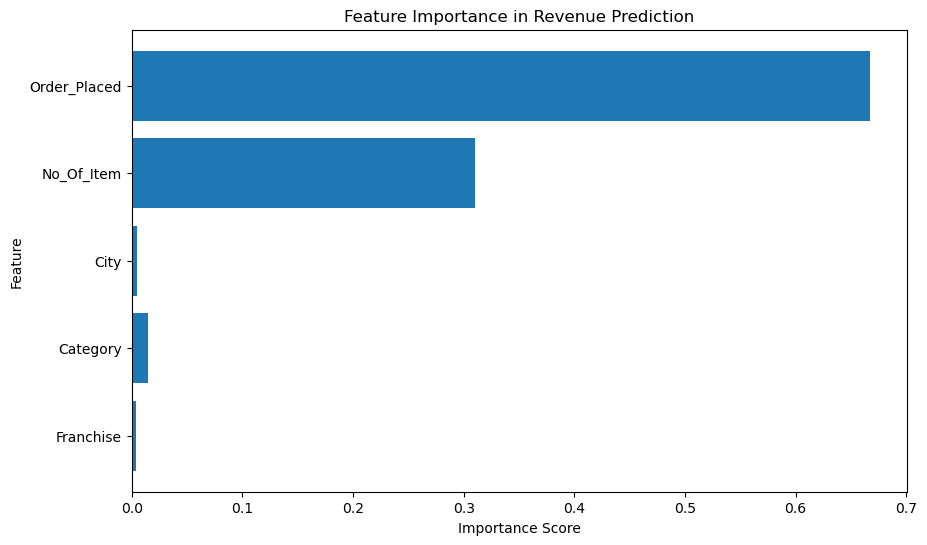

{'Franchise': 0.003464248558671437,
 'Category': 0.014402081482244387,
 'City': 0.004894493206530952,
 'No_Of_Item': 0.31014039800576104,
 'Order_Placed': 0.6670987787467921}

In [7]:
import matplotlib.pyplot as plt

# Feature importance analysis
feature_importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, align='center')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Revenue Prediction')
plt.show()

# Display feature importance values
feature_importance_dict = dict(zip(features, feature_importances))
feature_importance_dict